In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from sklearn.datasets import fetch_california_housing
cf=fetch_california_housing()
print(cf.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [ ]:
data=pd.DataFrame(cf.data,columns=cf.feature_names)

In [ ]:
data["target"]=cf.target
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
print(data.isna().sum())
print(data.shape)

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64
(20640, 9)


In [63]:
features=data.drop("target",axis="columns")
target=data["target"]

In [64]:
from sklearn.model_selection import *
x_train,x_test,y_train,y_test=train_test_split(features,target,random_state=323,test_size=0.1)

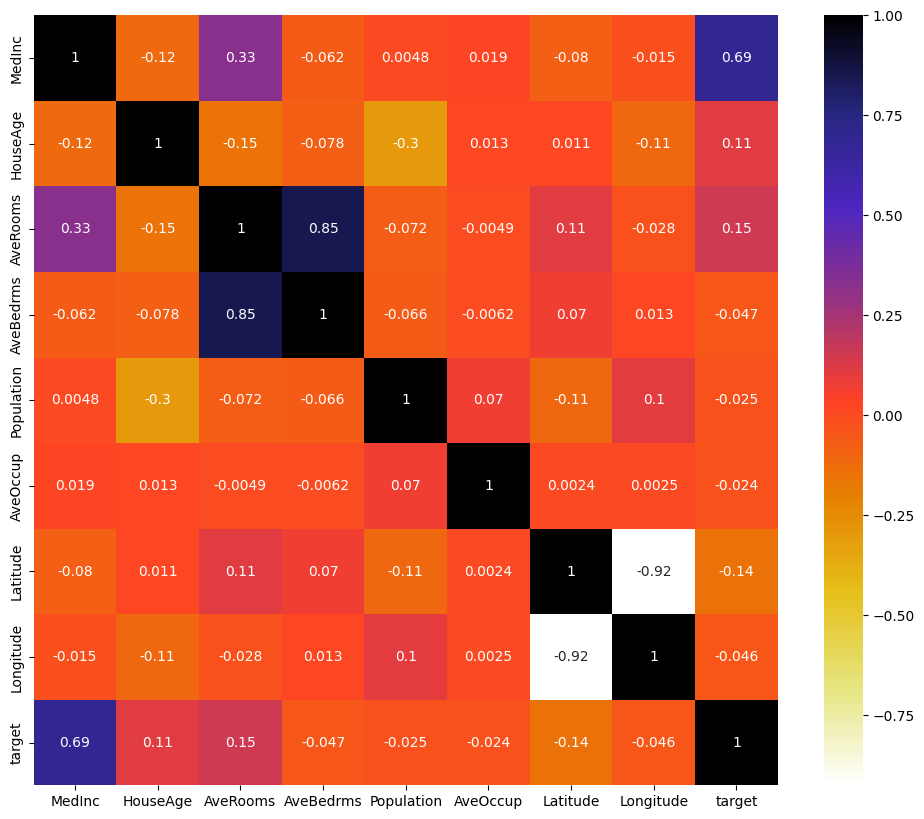

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(),annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [84]:
def correlation(dataset,threshold):
  col_corr=set()    #set of all names of correlated columns
  corr_matrix=dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if(abs(corr_matrix.iloc[i,j])>threshold):
        colname=corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr

In [98]:
corr_features=correlation(x_train,0.7)
corr_features

set()

In [102]:
x_train.drop(corr_features,axis=1)
x_test.drop(corr_features,axis=1)

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude
8862,8.01,52.00,6.25,503.00,2.59,34.06
7487,1.90,28.00,3.17,4551.00,4.89,33.92
19346,3.25,17.00,5.84,2036.00,2.29,38.58
6535,3.73,36.00,5.45,920.00,4.62,34.05
18237,4.19,16.00,4.22,1173.00,2.49,37.40
...,...,...,...,...,...,...
7178,3.33,41.00,3.42,814.00,4.52,34.05
12845,4.07,35.00,5.39,831.00,2.72,38.68
9219,1.95,36.00,4.98,639.00,2.61,37.12
14223,5.35,15.00,6.72,2118.00,2.79,32.67


In [116]:
x_train.head()
x_train.to_csv("train.csv")

In [111]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=500)
model.fit(x_train,y_train)

RandomForestRegressor(n_estimators=500)

In [115]:
print(round(model.score(x_test,y_test),2)*100)

74.0
